<a href="https://colab.research.google.com/github/kvsrsmz/WordEmbedding/blob/main/WordEmbedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Embedding Yöntemi Kullanılmadan Oluşturulan Model**




Hugging Face'in datasets kütüphanesinin sisteme yükleniyor.

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.4/491.4 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 6.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is in

* batubayk kişisinin hugging face üzerinde paylaştığı TR-News veri seti import edildi.

* Bu projede, Türkçe haber metinlerinden oluşan TR-News veri seti kullanılmıştır.
Bu veri seti, Hugging Face platformunda yer almakta olup, farklı haber kaynaklarından toplanmış Türkçe haber başlıkları, özetleri ve içerikleri ile birlikte her haberin ait olduğu konu etiketi (topic) bilgilerini içermektedir. Veri setinde yer alan haberler; spor, ekonomi, siyaset, teknoloji gibi farklı kategorilere ayrılmıştır.

In [ ]:
from datasets import load_dataset

dataset = load_dataset("batubayk/TR-News")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/614 [00:00<?, ?B/s]

train.csv:   0%|          | 0.00/686M [00:00<?, ?B/s]

validation.csv:   0%|          | 0.00/36.4M [00:00<?, ?B/s]

test.csv:   0%|          | 0.00/37.6M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/277573 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/14610 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/15379 [00:00<?, ? examples/s]

In [ ]:
# Veri setinin yapısı
print(dataset['train'].column_names)


['abstract', 'author', 'content', 'date', 'source', 'tags', 'title', 'topic', 'url']


Örnek bir haber verisinin çıktısı

In [ ]:
print(dataset["train"][0])


{'abstract': 'Şarkıcı Tuğba Özerk, annesine canlı yayında yönelttiği soru için Deniz Akkaya’ya 100 bin TL’lik manevi tazminat davası açtı.', 'author': None, 'content': 'Tuğba Özerk, “Duymayan Kalmasın” programında, annesi Günay Kapani’ye “Kızınızla aranız bozukmuş. Gerçekten onun sevgilisiyle birlikte oldunuz mu?” diye soran Deniz Akkaya’ya dava açtı. Ünlü şarkıcı, konuyla ilgili şöyle dedi: “Canlı yayında anneme akıl almaz bir soru yöneltti. Neye uğradığını şaşırdı kadın. Telefonu kapattıktan sonra rahatsızlandı. Deniz Akkaya hakkında suç duyurusunda bulundum, 100 bin liralık manevi tazminat davası açtım. Tazminatın tamamını şehit ailelerine bağışlayacağım.”', 'date': '13.01.2017 - 12:38', 'source': 'haberturk', 'tags': '[]', 'title': "Tuğba Özerk'ten Deniz Akkaya’ya 100 bin TL’lik dava", 'topic': 'Fiskos', 'url': 'https://www.haberturk.com/magazin/fiskos/haber/1348885-tugba-ozerkten-deniz-akkayaya-100-bin-tllik-dava'}


1. Gerekli kütüphaneler import edilir:

 *  pandas: Veri işleme için kullanılır (veri çerçevesi oluşturma, sütunlara erişim vs.).

 *  LabelEncoder: Kategorik (metinsel) etiketleri sayısal değerlere dönüştürmek için kullanılır.

2. Hugging Face'den yüklenen dataset içindeki eğitim (train) verisi alınır.

 * dataset["train"] veri setinin eğitim kısmıdır.

3. Veri içinden başlık (title) ve konu (topic) bilgileri ayrı ayrı listelere ayrılır.

 * titles: Tüm haber başlıklarını içerir.

 * topics: Her haberin ait olduğu konuyu (kategori) içerir. (örnek: Spor, Ekonomi)

4. Etiketler (topic) sayısal değerlere dönüştürülür.

 * LabelEncoder, metinsel etiketleri (örneğin "Spor", "Ekonomi", "Magazin") sayılara çevirir (örneğin 0, 1, 2).

 * Bu yeni sütun label adıyla df içine eklenir.

 * Model eğitiminde bu sayısal label sütunu kullanılacaktır.




In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Eğitim verilerini dataframe'e çevir
data = dataset["train"]

titles = [item["title"] for item in data]
topics = [item["topic"] for item in data]

df = pd.DataFrame({"title": titles, "topic": topics})

# Etiketleri sayılara çevir
le = LabelEncoder()
df["label"] = le.fit_transform(df["topic"])


Veri seti 4 parçaya ayrılır:

1. X_train: Modelin eğitileceği başlık (title) verileri (80%)

2. X_test: Modelin test edileceği başlık (title) verileri (20%)

3. y_train: X_train verilerine karşılık gelen etiket (label) değerleri

4. y_test: X_test verilerine karşılık gelen etiket (label) değerleri


test_size=0.2 → Veri setinin %20’si test için ayrılır.

random_state=42 → Aynı sonuçları tekrar elde etmek için sabit rastgelelik sağlar (tekrarlanabilirlik).

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df["title"], df["label"], test_size=0.2, random_state=42)


* TfidfVectorizer: Metin verisini TF-IDF (Term Frequency – Inverse Document Frequency) yöntemine göre sayısal hale getiren araçtır.

* max_features=5000: En fazla geçen 5000 kelime alınır. Bu, işlem süresini kısaltır ve modelin karmaşıklığını azaltır.



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF vektörleştirici
vectorizer = TfidfVectorizer(max_features=5000)  # 5000 en sık geçen kelimeyi al

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


* accuracy_score ve classification_report: Modelin başarımını ölçmek için kullanılır.

* Model nesnesi oluşturulur.

max_iter=1000: Maksimum iterasyon sayısı. Büyük veri setlerinde modelin converge etmesi (uygun çözüm bulması) için artırılır.
* Modelin başarı oranı (doğru tahmin oranı) yazdırılır.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Modeli eğit
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_tfidf, y_train)

# Tahmin yap
y_pred = clf.predict(X_test_tfidf)

# Sonuçları yazdır
print("Doğruluk Oranı:", accuracy_score(y_test, y_pred))


Doğruluk Oranı: 0.560569215527335


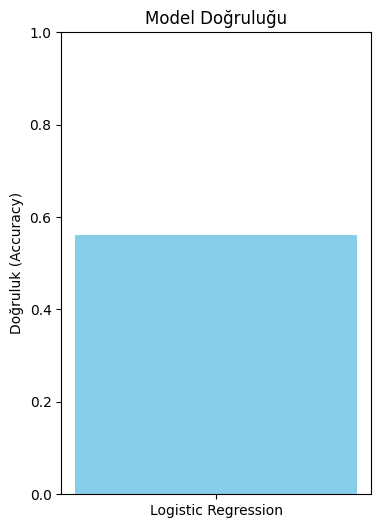

In [ ]:
import matplotlib.pyplot as plt

accuracy = accuracy_score(y_test, y_pred)

plt.figure(figsize=(4, 6))
plt.bar(["Logistic Regression"], [accuracy], color='skyblue')
plt.ylim(0, 1)
plt.ylabel("Doğruluk (Accuracy)")
plt.title("Model Doğruluğu")
plt.show()


# **Embeddingli Yöntem**

In [ ]:
from datasets import load_dataset
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

dataset = load_dataset("batubayk/TR-News")
data = dataset["train"]

titles = [item["title"] for item in data]
topics = [item["topic"] for item in data]

df = pd.DataFrame({"title": titles, "topic": topics})

le = LabelEncoder()
df["label"] = le.fit_transform(df["topic"])

X_train, X_test, y_train, y_test = train_test_split(df["title"], df["label"], test_size=0.2, random_state=42)


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.metrics import classification_report, accuracy_score

tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_len = max(len(seq) for seq in X_train_seq)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

num_classes = len(df["label"].unique())

model = Sequential([
    Embedding(input_dim=5000, output_dim=100, input_length=max_len),
    LSTM(64),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train_pad, y_train, epochs=5, validation_split=0.2, batch_size=32)

y_pred_nn = model.predict(X_test_pad)
y_pred_labels = y_pred_nn.argmax(axis=1)

print("Doğruluk Oranı (Embedding + LSTM):", accuracy_score(y_test, y_pred_labels))
#print(classification_report(y_test, y_pred_labels, target_names=le.classes_))


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


5552/5552 ━━━━━━━━━━━━━━━━━━━━ 160s 28ms/step - accuracy: 0.3345 - loss: 2.5659 - val_accuracy: 0.4897 - val_loss: 1.9200
Epoch 2/5
5552/5552 ━━━━━━━━━━━━━━━━━━━━ 202s 28ms/step - accuracy: 0.4930 - loss: 1.8780 - val_accuracy: 0.5193 - val_loss: 1.7315
Epoch 3/5
5552/5552 ━━━━━━━━━━━━━━━━━━━━ 204s 29ms/step - accuracy: 0.5255 - loss: 1.7009 - val_accuracy: 0.5313 - val_loss: 1.6783
Epoch 4/5
5552/5552 ━━━━━━━━━━━━━━━━━━━━ 200s 28ms/step - accuracy: 0.5438 - loss: 1.6221 - val_accuracy: 0.5353 - val_loss: 1.6499
Epoch 5/5
5552/5552 ━━━━━━━━━━━━━━━━━━━━ 211s 30ms/step - accuracy: 0.5550 - loss: 1.5718 - val_accuracy: 0.5381 - val_loss: 1.6432
1735/1735 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step
Doğruluk Oranı (Embedding + LSTM): 0.5359632531748176


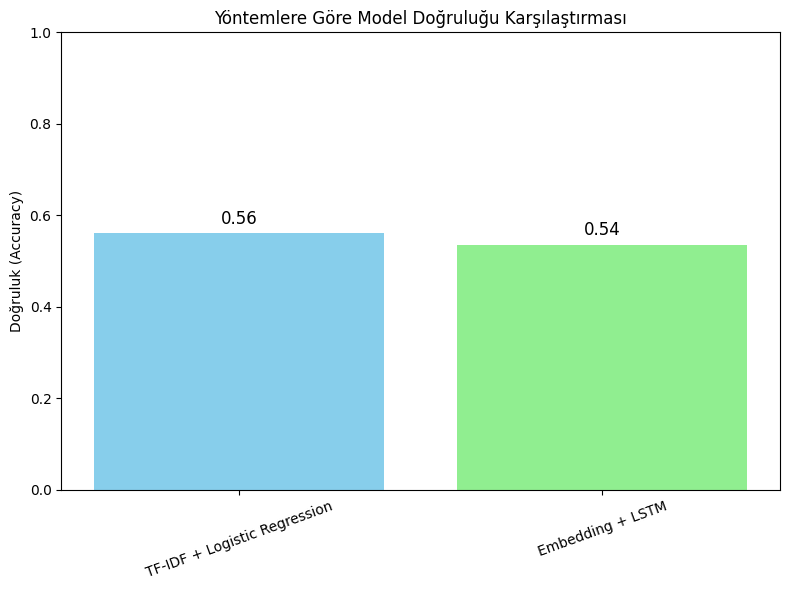

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Doğruluk oranlarını hesapla
accuracy_tfidf = accuracy_score(y_test, y_pred)            # TF-IDF + Logistic Regression
accuracy_lstm = accuracy_score(y_test, y_pred_labels)      # Embedding + LSTM

# Grafik için veriler
models = ["TF-IDF + Logistic Regression", "Embedding + LSTM"]
accuracies = [accuracy_tfidf, accuracy_lstm]

# Grafik çizimi
plt.figure(figsize=(8, 6))
bars = plt.bar(models, accuracies, color=['skyblue', 'lightgreen'])
plt.ylim(0, 1)
plt.ylabel("Doğruluk (Accuracy)")
plt.title("Yöntemlere Göre Model Doğruluğu Karşılaştırması")

# Çubukların üzerine değerleri yaz
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f"{yval:.2f}", ha='center', fontsize=12)

plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import io

# Embedding katmanını al
embedding_layer = model.layers[0]
embedding_weights = embedding_layer.get_weights()[0]  # (5000, 100)

# Kelime indexlerini al
word_index = tokenizer.word_index
reverse_word_index = {idx: word for word, idx in word_index.items()}

# Kelimeleri sıraya koy
words = []
vectors = []

for i in range(1, 5000):  # 0 = padding, 1 = OOV token
    word = reverse_word_index.get(i, "")
    vector = embedding_weights[i]
    words.append(word)
    vectors.append(vector)

# metadata.tsv dosyasını yaz
with open("metadata.tsv", "w", encoding="utf-8") as f:
    for word in words:
        f.write(f"{word}\n")

# vectors.tsv dosyasını yaz
with open("vectors.tsv", "w", encoding="utf-8") as f:
    for vec in vectors:
        f.write("\t".join([str(x) for x in vec]) + "\n")


In [ ]:
from google.colab import files
files.download("metadata.tsv")
files.download("vectors.tsv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>